# La présence de bibliothèques autour des lycées augmente-t-elle la performance des lycées ?

In [ ]:
# Setup

# Si la commande n'avait pas déjà été lancée dans le terminal
!pip install -r "requirements.txt"
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from plotnine import *

pd.set_option('display.width', 140)

En tant qu'examen sanctionnant la fin des études secondaires, les résultats à 
l'examen du baccalauréat sont particulièrement scrutés pour attester de la 
performance d'un lycée. A ce titre, deux indicateurs "bruts" sont mobilisables :

-   Le *taux de réussite*, c'est-à-dire le pourcentage d’élèves présents aux 
    épreuves du baccalauréat ayant obtenu le diplôme
-   Le *taux de mention*, c'est-à-dire le pourcentage d’élèves présents aux 
    épreuves du baccalauréat ayant obtenu le diplôme avec une mention (Assez 
    Bien, Bien ou Très Bien)

La performance des lycées peut être expliquée par trois facteurs :

-	par le *public* de l’établissement (les élèves et leur origine sociale)
-	par le *contexte* de l’établissement (ses propriétés intrinsèques et 
    possiblement les politiques éducatives dont il fait objet)
-	par l'*environnement* de l’établissement (ce qui est relatif à sa 
    situation géographique)

Concernant le premier point, de travaux sociologiques démontrent un lien fort 
entre origine sociale des élèves (appréhendée par la position sociale de leurs
parents) et leur réussite. En bref, les élèves héritent une grande partie du 
capital culturel de leurs parents[^nbp1], ce qui explique les dynamiques de 
reproduction sociale.

[^nbp1]: P. Bourdieu et J.-C. Passeron, *Les Héritiers. Les étudiants et la culture*, 
Paris, Minuit, 1964

Le contexte de l'établissement est aussi important pour comprendre les 
performances des lycées. En effet, nous pouvons imaginer que la présence 
d'options ou de sections peut amener à approfondir certains domaines 
d'enseignement, favorisant la réussite des élèves. Surtout, en lien avec le 
point précédent, les stratégies parentales d'éducation s'appuient notamment sur la 
présence d'options dans un lycée donné. L'idée est justement de bénéficier de ces 
options pour en bénéficier et se distinguer sur le plan scolaire des élèves les 
plus fragiles issus des classes populaires.

Enfin, notre étude se concentre sur les facteurs environnementaux de réussite 
scolaire. Plus précisément, il s'agit de considérer un facteur : la présence de 
bibliothèques autour des lycées. Les bibliothèques, qu’elles soient municipales, 
universitaires ou d’une autre nature, sont en effet des lieux qui peuvent 
favoriser la réussite des élèves par au moins deux moyens : d’abord, ce sont des 
lieux d’accès à la culture et à la connaissance ; d’autre part, ce sont aussi des 
lieux de révision privilégiés, notamment pour la préparation du baccalauréat. Des 
travaux sociologiques qualitatives ont notamment étudié la manière dont certains
lycéens s'approprier les bibliothèques pour préparer l'examen du baccalauréat[^nbp2].

[^nbp2]: A. Zuddas, « Préparer le bac à la Bpi : enquête auprès des usagers lycéens », 2010 
(en ligne : https://archivesic.ccsd.cnrs.fr/sic_01024397 ; consulté le 22 novembre 2025) ; 
C. Roquebert, « Les lycéens, le bac et la BnF. Enquête sur les usagers lycéens à la 
Bibliothèque nationale de France », 2012 
(en ligne : https://www.bnf.fr/sites/default/files/2018-11/enquete_lyceens_bac_bnf.pdf ; 
consulté le 22 novembre 2025)

Notre démarche sera alors d'étudier quantitativement le lien entre proximité d’une (ou de) 
bibliothèque(s) et performance des lycées. Cette proximité sera évaluée par la distance 
géographique, ou aussi par le nombre d’équipements disponibles dans un rayon donné. En bref,
la question que nous nous posons est la suivante : la proximité des bibliothèques autour 
des lycées est-elle associée à de meilleures performances au baccalauréat général, toutes
choses égales par ailleurs ?

Étant donné l'appropriation mise en avant dans la littérature cité auparavant, nous nous
attendons à un effet positif des bibliothèques sur les performances des lycées. Cependant,
la force des autres explicatifs (notamment, l'origine sociale des étudiants) et le choix
de l'échelle d'analyse (le lycée) nous conduisent à penser que l'effet estimé sera très faible,
voire non significatif. Pour estimer un effet conséquent, il faudrait notamment supposer 
que tous les lycéens révisent leur baccalauréat dans une bibliothèque proche du lycée,
ce qui est une hypothèse relativement forte.

### Méthodes

Après quelques statistiques descriptives et cartes pour illustrer le problème, des régressions 
linéaires seront mobilisées pour tester notre hypothèse, en contrôlant par d’autres variables. En 
partant des facteurs mis en évidence précédemment, la composition sociale du lycée sera appréciée 
à partir de l’indice de position sociale proposée par la Depp (cf. rubrique [Données](#données)). Le 
contexte de l’établissement sera surtout pris en compte par le secteur de l’établissement 
(privé / public) et les filières et formations disponibles en son sein (filières technologiques 
et professionnelles, formations post-baccalauréat comme les BTS ou CPGE...).

### Données

Pour ce qui est des données mobilisées, l’échelle d’observation sera le lycée. Le champ d’étude 
est limité aux lycées de France métropolitaine (hors Corse) avec au moins 50 candidats présents 
aux épreuves du baccalauréat général en 2024. 

Il s’agira alors de construire nos observations à partir de trois bases de données ouvertes 
produites par la Depp (service statistique ministériel de l’Education nationale) :

-   *Indicateurs de résultats des lycées* 
([lien direct vers la source](https://data.education.gouv.fr/explore/dataset/fr-en-indicateurs-de-resultat-des-lycees-gt_v2/information/))
-   *Indices de position sociale des lycées*
([lien direct vers la source](https://data.education.gouv.fr/explore/dataset/fr-en-ips-lycees-ap2023/information/))
-   *Annuaire de l'éducation* 
([lien direct vers la source](https://data.education.gouv.fr/explore/dataset/fr-en-annuaire-education/information))

Pour acquérir la densité de la commune des lycées, les données sur ces derniers seront également 
enrichies ponctuellement par la base *Communes et villes de France* disponible sur data.gouv.fr
([lien direct vers la source](https://www.data.gouv.fr/datasets/communes-et-villes-de-france-en-csv-excel-json-parquet-et-feather/informations)). 

Enfin, la base des bibliothèques sera constituée à partir des *Fiches descriptives de bibliothèques 
issues du répertoire du CCFr* disponible sur le site de la Bibliothèque nationale de France
([lien direct vers la source](https://api.bnf.fr/index.php/fr/CCFr/Repertoire_Bibliotheques))


## Analyse descriptive des données

### Les données sur les lycées

In [2]:
# Importation des données sur les lycées

# NB : le téléchargement peut prendre jusqu'à deux minutes

from src.data_lycees import get_data_lycees
from src.data_lycees import merge_data_lycees
from src.data_lycees import filter_data_lycees

lycees_resultats, lycees_ips, annuaire_education = get_data_lycees()
lycees_data_0 = merge_data_lycees(lycees_resultats, lycees_ips, annuaire_education)
lycees_data = filter_data_lycees(lycees_data_0)

/home/onyxia/work/ensae-pythonds/src/data_lycees.py:241: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
/home/onyxia/work/ensae-pythonds/src/data_lycees.py:242: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
/home/onyxia/work/ensae-pythonds/src/data_lycees.py:243: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.


Pour rappel, les données sur les lycées ont été obtenues sur le site de l'Education 
nationale française ([data.education.gouv.fr](https://data.education.gouv.fr)). Trois 
jeux de données complémentaires sont mobilisés et joints successivement sur l'`UAI`, 
c'est-à-dire le numéro d'Unité Administrative Immatriculée qui est l'identifiant unique
des établissements éducatifs. Dans l'ordre d'utilisation :

-   *Indicateurs de résultats des lycées*
([lien direct vers la source](https://data.education.gouv.fr/explore/dataset/fr-en-indicateurs-de-resultat-des-lycees-gt_v2/information/))
-   *Indices de position sociale des lycées*
([lien direct vers la source](https://data.education.gouv.fr/explore/dataset/fr-en-ips-lycees-ap2023/information/))
-   *Annuaire de l'éducation*
([lien direct vers la source](https://data.education.gouv.fr/explore/dataset/fr-en-annuaire-education/information))

Pour récupérer la densité de la commune du lycée, la base *Communes et villes de France* est téléchargée depuis [data.gouv.fr](https://www.data.gouv.fr) 
([lien direct vers la source](https://www.data.gouv.fr/datasets/communes-et-villes-de-france-en-csv-excel-json-parquet-et-feather/informations)).

A l'import des données, pour des questions de représentativité et de simplicité, on se restreint aux lycées
qui satisfont aux deux conditions suivants :
-   au moins 50 candidats étaient présents à l'examen du baccalauréat général
-   le lycée est situé en Hexagone (hors Corse)

Au final, on obtient une base de données avec 1911 lycées.

In [3]:
# Lycées table

lycees_data

,uai,annee,presents_gnle,taux_reu_gnle,taux_men_gnle,ips_voie_gt,ecart_type_voie_gt,libelle_etablissement,position,latitude,...,voie_professionnelle,section_arts,section_cinema,section_theatre,section_sport,section_internationale,section_europeenne,post_bac,grille_densite_texte,grille_densite_4
0,0010006B,2024,104.0,98.0,63.0,99.2,32.0,Lycée polyvalent Saint-Exupéry,POINT (917623.9 6560849.305),46.112484,...,1,1,0,0,0,0,1,1,Centres urbains intermédiaires,Centres urbains intermédiaires
1,0010010F,2024,145.0,92.0,62.0,110.2,33.0,Lycée polyvalent du Bugey,POINT (909024.7 6521619.905),45.762141,...,1,1,0,0,1,0,1,0,Petites villes,Petites villes
2,0010013J,2024,330.0,99.0,81.0,123.7,35.1,Lycée Lalande,POINT (871577.8 6569320.405),46.201967,...,0,1,1,1,0,0,1,1,Centres urbains intermédiaires,Centres urbains intermédiaires
3,0010014K,2024,234.0,94.0,59.0,108.6,32.9,Lycée Edgar Quinet,POINT (871668.3 6568818.605),46.197427,...,0,1,1,1,0,0,1,1,Centres urbains intermédiaires,Centres urbains intermédiaires
4,0010016M,2024,233.0,96.0,59.0,110.6,33.7,Lycée polyvalent Joseph-Marie Carriat,POINT (871495.2 6568856.805),46.197815,...,1,1,1,1,1,0,1,1,Centres urbains intermédiaires,Centres urbains intermédiaires
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,0951994B,2024,55.0,100.0,62.0,120.3,30.8,Lycée polyvalent privé ORT,POINT (656814 6877316.404),48.994320,...,1,0,0,0,0,0,0,0,Grands centres urbains,Grands centres urbains
2209,0952158E,2024,59.0,97.0,64.0,121.5,32.3,Lycée Paul Ricoeur,POINT (664045.3 6882755.904),49.043675,...,0,0,0,0,0,0,0,0,Centres urbains intermédiaires,Centres urbains intermédiaires
2210,0952173W,2024,136.0,85.0,31.0,93.6,30.8,Lycée Paulette Nardal,POINT (642504.5 6869354.704),48.921608,...,1,0,0,1,0,0,1,0,Grands centres urbains,Grands centres urbains
2211,0952196W,2024,342.0,92.0,60.0,115.1,36.5,"Lycée polyvalent Gustave Monod, Lycée des méti...",POINT (648440.5 6874902.404),48.971996,...,1,0,0,1,0,0,1,1,Grands centres urbains,Grands centres urbains


Dans notre jeu de données, nous disposons ainsi de plusieurs variables importantes pour notre analyse :

-   les *variables de* "*performance*", que l'on cherche à expliquer
    +   Le taux de réussite au baccalauréat général (`taux_reu_gnle`) : 
    pourcentage d’élèves présents aux épreuves du baccalauréat général ayant obtenu le diplôme
    +   Le taux de mention au baccalauréat général (`taux_men_gnle`) : 
    pourcentage d’élèves ayant obtenu une mention (Assez Bien, Bien ou Très Bien)

-   les *variables de composition sociale*, qui seront importantes à prendre en compte en 
    tant que variables de contrôle
    +   Note préalable : l'Indice de Position Sociale (IPS) est d'abord calculé individuelle.
     A partir des résultats nationaux et des professions des parents des élèves, l'IPS synthétise 
     la position sociale des élèves et correspond à peu près à la performance attendu d'un élève 
     compte tenu son origine sociale (nous y reviendrons plus tard). Cet IPS individuel n'est pas 
     public et on dispose uniquement d'indicateurs agrégés.
    +   La moyenne de l'IPS dans l'établissement (`ips_voie_gt`) : plus l’IPS moyen est élevé, 
    plus le public accueilli est socialement favorisé
    +   L'écart-type de l'IPS dans l'établissement (`ecart_type_voie_gt`) : plus cet écart-type
     est élevé, plus le lycée concerné fait face à un public plus divers socialement.

-   des *variables renseignant sur les formations ou filières* disponibles dans le lycée
    +   la présence de filières technologiques (`voie_technologique`) 
    +   la présence de filières professionnelles (`voie_professionnelle`) 
    +   la présence d'une section européenne (`section_europeenne`) 
    +   la présence de formation post-bac, comme les CPGE ou les BTS (`post_bac`) 

-   des *métadonnées sur l'établissement*
    +   son nom (`libelle_etablissement`)
    +   son statut (`statut_public_prive`)
    +   son inscription géographique large (`nom_commune`, `libelle_departement`, 
    `libelle_academie`, `libelle_region`)
    +   la densité de la commune en 7 catégories (`grille_densite_texte`)
    +   la densité de la commune en 4 catégories (`grille_densite_4`) : il s'agit d'une variable
    recodée à partir de la nomenclature pour avoir des effectifs plus importants (ont été regroupé les
     catégories "Rural à habitat très dispersé" et "Rural à habitat dispersé" dans la 
     catégorie "Bourgs ruraux" ; même chose pour les villes des "Ceintures urbaines" et 
     qui ont rejoint les "Petites villes")


Jetons désormais un coup d'œil rapide sur les données pour mieux comprendre la forme des données. 

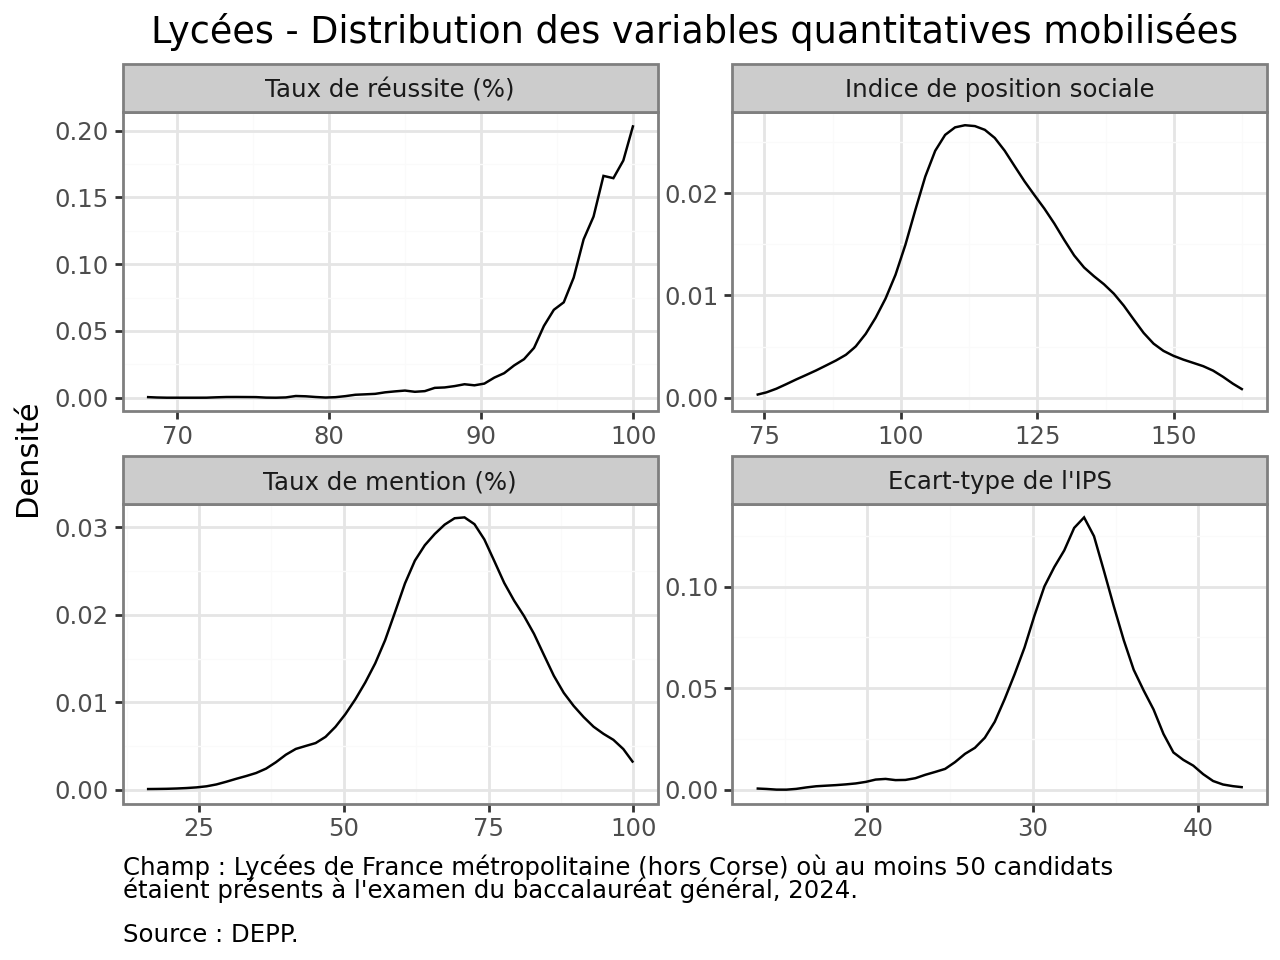

In [4]:
# Stats desc. - Lycées vars numériques

from src.stats_desc import lycees_stat_desc_num

plot_champ = "Lycées de France métropolitaine (hors Corse) où au moins 50 candidats \nétaient présents à l'examen du baccalauréat général, 2024."
plot_source = "DEPP"

dat_lycees_stat_desc_num = lycees_stat_desc_num(lycees_data)
(
    ggplot(dat_lycees_stat_desc_num) +
    aes(x = 'value') +
    geom_density(n = 50) +
    facet_wrap('variable', scales = 'free') +
    theme_bw() +
    labs(
        x = "", y = "Densité",
        title = "Lycées - Distribution des variables quantitatives mobilisées",
        caption = f"Champ : {plot_champ}\n\nSource : {plot_source}."
    ) +
    theme(plot_caption = element_text(ha = "left"))
)


La densité du taux de réussite au baccalauréat général est fortement concentrée autour de valeurs élevées, avec un pic proche de 95–100 %. La distribution est peu dispersée, avec un effet de plafond : la majorité des lycées atteignent un niveau de réussite élevé, tandis qu’un nombre restreint d’établissements affiche des performances nettement plus faibles.

À l’inverse, la densité du taux de mention est beaucoup plus étalée et présente une dispersion marquée. La distribution est asymétrique à droite, indiquant que si une majorité de lycées obtient des taux de mention intermédiaires, une fraction non négligeable d’établissements se distingue par des performances très élevées. 

L'hétérogénéité du taux de mention suggère qu'il constitue une mesure plus fine de la performance scolaire et permet de mieux discriminer les "bons" établissements des "mauvais". C'est pour cette raison que nous nous concentrerons sur cet indicateur par la suite.

Pour ce qui est de la moyenne de l'IPS, sa dispersion est relativement forte, même s'il est dur d'interpréter cette valeur qui n'a pas d'unité. Au sein des établissements, il est possible de remarqué que la variabilité de l'écart-type est aussi relativement importante.


In [5]:
# Stats desc. - Lycées vars catégorielles

(
    lycees_data
    .groupby(['grille_densite_4'])
    .size()
    .div(lycees_data.shape[0])
    .mul(100)
)


/tmp/ipykernel_45506/1276477359.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


grille_densite_4
Grands centres urbains            50.811094
Centres urbains intermédiaires    27.786499
Petites villes                    13.448456
Bourgs ruraux                      7.901622
dtype: float64

La plupart des lycées sont situés dans des communes relativement denses. Cela n'est pas très surprenant étant donné la concentration des services offerts à la population dans les grandes villes.

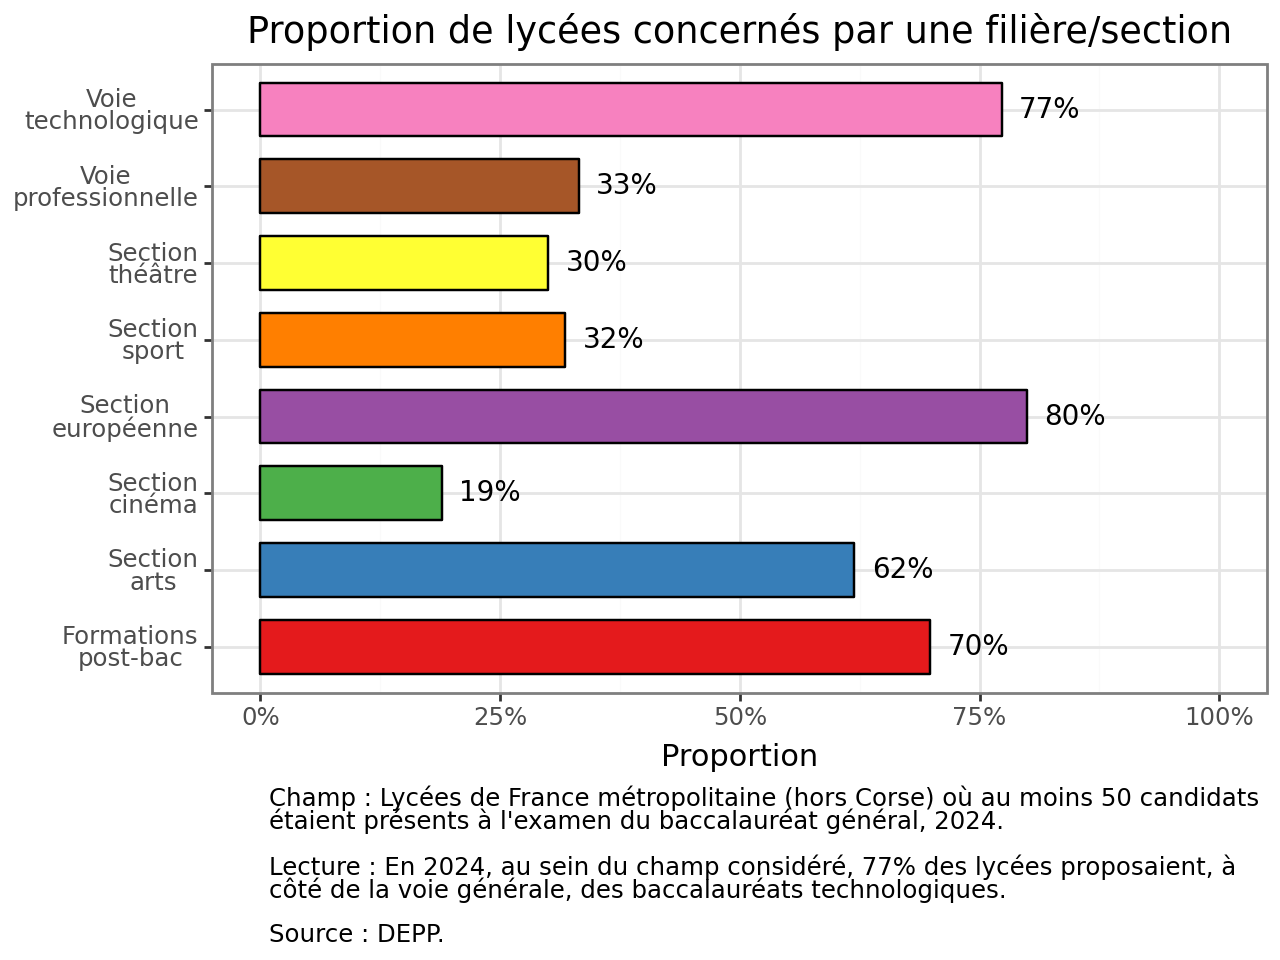

In [6]:
# Stats desc. - Lycées vars binaires

from src.stats_desc import lycees_stat_desc_bin
plot_champ = "Lycées de France métropolitaine (hors Corse) où au moins 50 candidats \nétaient présents à l'examen du baccalauréat général, 2024."
plot_lecture = "En 2024, au sein du champ considéré, 77% des lycées proposaient, à \ncôté de la voie générale, des baccalauréats technologiques."
plot_source = "DEPP"
plot_caption = f"Champ : {plot_champ}\n\nLecture : {plot_lecture}\n\nSource : {plot_source}."

dat_lycees_stat_desc_bin = lycees_stat_desc_bin(lycees_data)

(
    ggplot(dat_lycees_stat_desc_bin, aes(x = 'variable', y = 'prop', fill = 'variable')) +
    geom_bar(stat = 'identity', color = 'black', width = 0.7) +
    geom_text(
        aes(label = 'prop'), format_string = '{:.0%}',
        nudge_y = 0.05, size = 10, color = 'black'
    ) +
    labs(
        title = 'Proportion de lycées concernés par une filière/section',
        x = '', y = 'Proportion',
        caption = plot_caption
    ) +
    scale_y_continuous(labels = lambda x: [f"{v:.0%}" for v in x]) +
    scale_fill_brewer(type = 'qual', palette = 'Set1') +
    coord_flip(ylim = [0, 1]) +
    theme_bw() +
    theme(
        legend_position='none'
    )
)


Enfin, sur le plan des formations proposées, nous pouvons remarquer que certaines formations sont plus communes que d'autres. Plus de la moitié des lycées proposent, à côté des voies générales, des baccalauréats technologiques (77 %), des formations post-bac (70 %), une section européenne (80 %) ou une section arts (62 %).

A ce stade, il est possible d'émettre un regret sur la précision quant aux formations post-bac présentes dans les lycées. Il aurait en effet été particulièrement intéressant de différencier différents types de formation : par exemple, ce n'est pas la même chose de proposer des brevets de technicien supérieur (BTS) ou d'accueillir des classes préparatoires aux grandes écoles (CPGE).

### Les données sur les bibliothèques

Rappelons brièvement que les données sur les bibliothèques proviennent du répertoire du Catalogue collectif de France, disponible sur l'API de la Bibliothèque nationale de France ([lien direct](https://api.bnf.fr/index.php/fr/CCFr/Repertoire_Bibliotheques)). L'avantage de cette source de données est de proposer des données géolocalisées. D'autres informations présentes sont également utiles pour spécifier les bibliothèques auxquelles on a affaire.


In [7]:
# Importation des données sur les bibliothèques

from src.data_biblio import get_data_biblio

biblio_0 = get_data_biblio()

In [8]:
# Biblio table

biblio_0

,NOMETAB,PAYS,CODEPOSTAL,LATITUDE,LONGITUDE,CONDITIONACCES_d,TYPEFAMABES_d,geometry
0,"Bibliothèque municipale. Lyon, Rhône",FR,69431,45.760940,4.857483,Tous publics,Bibliothèque Municipale,POINT (844367.27 6519624.236)
1,"Bibliothèque municipale. Baume-les-Dames, Doubs",FR,25110,47.351700,6.361317,Tous publics,Bibliothèque Municipale,POINT (953675.138 6699996.481)
2,Service des ressources documentaires. Rosières...,fr,10430,48.269882,4.062266,Accès réservé,Bibliothèque Universitaire,POINT (778817.499 6797146.375)
3,Muséum national d'histoire naturelle. Biblioth...,FR,75005,48.841528,2.357592,Tous publics,Bibliothèque Universitaire,POINT (652851.006 6860356.163)
4,"Médiathèque municipale. Rambervilliers, Vosges",FR,88700,48.345610,6.633583,Tous publics,Bibliothèque Municipale,POINT (969128.655 6811226.321)
...,...,...,...,...,...,...,...,...
5162,École supérieure d'art et de design. Bibliothèque,FR,72000,48.006405,0.196126,Tous publics,None,POINT (490957.439 6771047.259)
5163,Centre du réseau Sudoc PS Nouvelle Aquitaine -...,FR,33608,46.036636,2.636719,None,Bibliothèque Universitaire,POINT (671903.429 6548606.93)
5164,France. Service historique de la Défense. Pau,FR,64000,43.298582,-0.378599,Tous publics,Bibliothèque Spécialisée,POINT (425763.684 6250247.3)
5165,"Musée Alexandre Dumas. Villers-Cotterêts, Aisne",fr,02600,49.253033,3.089553,Tous publics,Bibliothèque Spécialisée,POINT (706520.869 6905933.607)


Dans la suite de l'analyse, nous allons nous restreindre aux bibliothèques qui se sont déclarées comme étant "Tous publics". Cela représente principalement des bibliothèques municipales, mais aussi des bibliothèques universitaires.

In [9]:
# Stats desc. - Typologie bibliothèques

pd.crosstab(
    biblio_0['TYPEFAMABES_d'],
    biblio_0['CONDITIONACCES_d'],
    margins = True
    )

CONDITIONACCES_d,Accès réservé,Tous publics,All
TYPEFAMABES_d,,,
Autre Bibliothèque de Lecture Publique,3,23,26
Bibliothèque Départementale de Prêt,1,6,7
Bibliothèque Municipale,7,1203,1210
Bibliothèque Nationale,22,3,25
Bibliothèque Non Spécialisée,450,518,968
Bibliothèque Scolaire,22,6,28
Bibliothèque Spécialisée,186,387,573
Bibliothèque Universitaire,806,719,1525
All,1497,2865,4362


Ainsi, 2865 bibliothèques sont retenues dans notre base de données après considération des conditions d'accès.

In [10]:
# Biblios - Filtre conditions d'accès

biblio = biblio_0[biblio_0['CONDITIONACCES_d'] == 'Tous publics']

### Croiser les données des lycées et des bibliothèques

Après avoir considéré séparément les données des lycées et des bibliothèques, il faut maintenant les
faire se rencontrer. 

Une première manière de le faire est de calculer la distance (à vol d'oiseau) entre un lycée et la bibliothèque la plus proche. 

In [11]:
# Calculs - Distance à la bibliothèque la plus proche
from src.calcul_distance import calcul_distance

lycees_data = calcul_distance(lycees_data, biblio)

In [12]:
# Stats desc. - Distance à la bibliothèque la plus proche

probs = list(np.arange(0, 1.1, 0.1))
print("Moyenne :", lycees_data['dist_proche_biblio_m'].mean().round(1))
print("Ecart-type :", lycees_data['dist_proche_biblio_m'].std().round(1))
lycees_data['dist_proche_biblio_m'].quantile(q = probs).to_frame().transpose().round()

Moyenne : 2420.7
Ecart-type : 5141.5


,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
dist_proche_biblio_m,11.0,227.0,341.0,455.0,608.0,776.0,986.0,1231.0,1741.0,5869.0,40547.0


La moitié des lycées se situe à au plus 776 mètres d'une bibliothèque. La moyenne de la série est portée par les valeurs extrêmes. En effet, la distance maximale dépasse les 40 km. Cette mesure fournit une première approche continue de la proximité à l’équipement culturel le plus accessible.


A partir de ce premier constat sur la distance entre lycées et bibliothèques, 
illustrons le problème soulevé par ce projet à l'aide d'une carte où sont représentés à
la fois les lycées et les bibliothèques. Par simplicité, nous nous concentrerons ici sur le cas de 
la ville de Paris. \
NB : *Il est possible de changer le département d'analyse en changeant la variable `code_dep` dans le code ci-dessus. Attention à fixer le paramètre `zoom_start` à 10 pour avoir la bonne échelle dès le départ.*

In [13]:
# Carte lycées & bibliothèques

from src.stats_desc import map_croisee
code_dep = "75"
zoom_start = 12

lycees_dep = lycees_data[lycees_data['code_departement'] == "0" + code_dep]
biblio_dep = biblio[biblio['CODEPOSTAL'].str[0:2] == code_dep]

map_croisee(biblio_dep, lycees_dep, zoom_start = zoom_start)

Paris constitue un cas particulier de notre étude : la densité des bibliothèques y est particulièrement élevée. Cependant, l'idée à l'origine de notre projet y est présente. Par cette représentation, il est déjà possible de visualiser le lien entre proximité des bibliothèques et performance des lycées

Par la suite, nous pouvons calculer le nombre de bibliothèques localisées dans un rayon donné autour d'un lycée donné. Complémentaire avec la distance avec la bibliothèque la plus proche, cette approche permet de capter l’intensité de l’offre culturelle accessible à proximité immédiate des établissements scolaires.

In [14]:
# Calculs - Présence et nombre de bibliothèques à proximité

from src.calcul_biblio_rayons import calcul_biblio_rayons
rayons = (500, 1000, 2000, 5000)
lycees_data = calcul_biblio_rayons(lycees_data, biblio, rayons=rayons)


Dans notre approche nous avons retenu les seuils suivant : 500 m, 1 km, 2 km et 5 km. Pour chaque rayon, de nouvelles variables sont ainsi créées à l'occasion : `nb_biblio_{rayon}` et  `dummy_biblio_{rayon}`.

In [15]:
# Stats desc. - Présence et nombre de bibliothèques à proximité

(
    lycees_data
    .groupby(['dummy_biblio_500', 'dummy_biblio_1000', 'dummy_biblio_2000', 'dummy_biblio_5000'])
    .size()
    .div(lycees_data.shape[0])
    .mul(100)
    .round(1)
)

dummy_biblio_500  dummy_biblio_1000  dummy_biblio_2000  dummy_biblio_5000
False             False              False              False                10.6
                                                        True                  7.1
                                     True               True                 21.8
                  True               True               True                 27.0
True              True               True               True                 33.5
dtype: float64

Les *dummies* (variables binaires) reprennent en partie l'information de la distance à la bibliothèques la plus proche. L'information est moins fine, mais nous disposons désormais de variables binaires permettant de dire si au moins une bibliothèque est situé dans un rayon donné par rapport aux lycées. En bref, on peut noter que 33,5 % des lycées sont situés à moins de 500 m d'une bibliothèque. Inversement, 10,6 % des lycées sont situés à plus de 5 km de la plus proche bibliothèque.

Regardons désormais la distribution du nombre de bibliothèques.

In [16]:
probs = list(np.arange(0, 1.1, 0.1)) 
for r in rayons:
    print(f"Rayon considéré : {r} m")
    print(
        "Moyenne :", lycees_data[f'nb_biblio_{r}'].mean().round(1),
        ' *** '
        "Ecart-type :", lycees_data[f'nb_biblio_{r}'].std().round(1)
    )
    print("Décile de la distribution")
    print(lycees_data[f'nb_biblio_{r}'].quantile(q = probs).round().astype('int').to_frame().transpose())
    print("\n")

Rayon considéré : 500 m
Moyenne : 1.7  *** Ecart-type : 11.7
Décile de la distribution
               0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
nb_biblio_500    0    0    0    0    0    0    0    1    1    2  153


Rayon considéré : 1000 m
Moyenne : 3.9  *** Ecart-type : 17.5
Décile de la distribution
                0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
nb_biblio_1000    0    0    0    0    1    1    1    2    3    6  216


Rayon considéré : 2000 m
Moyenne : 7.9  *** Ecart-type : 23.3
Décile de la distribution
                0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
nb_biblio_2000    0    0    1    1    1    2    3    5    8   16  261


Rayon considéré : 5000 m
Moyenne : 22.4  *** Ecart-type : 48.0
Décile de la distribution
                0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
nb_biblio_5000    0    0    1    2    3    5    9   16   24   52  333




Le nombre de bibliothèques augmente avec avec la taille du rayon considéré, ce qui est assez logique. Toutefois, des valeurs extrêmes déforment assez fortement la moyenne, ce qui peut être problématique pour la suite. Pour prendre en compte cela, nous bornons les valeurs hautes au 95e percentile, pour resserrer la distribution. Nous faisons ici l'hypothèse réaliste que, dans un espace donné, il existe un point de saturation à partir duquel le nombre de bibliothèques n'a plus d'effet.

In [17]:
from src.calcul_biblio_rayons import correction_biblio_rayons

lycees_data = correction_biblio_rayons(lycees_data)

probs = list(np.arange(0, 1.1, 0.1)) 
for r in rayons:
    print(f"Rayon considéré : {r} m")
    print(
        "Moyenne :", lycees_data[f'nb_biblio_{r}'].mean().round(1),
        ' *** '
        "Ecart-type :", lycees_data[f'nb_biblio_{r}'].std().round(1)
    )
    print("Décile de la distribution")
    print(lycees_data[f'nb_biblio_{r}'].quantile(q = probs).round().astype('int').to_frame().transpose())
    print("\n")

Rayon considéré : 500 m
Moyenne : 0.6  *** Ecart-type : 1.1
Décile de la distribution
               0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
nb_biblio_500    0    0    0    0    0    0    0    1    1    2    4


Rayon considéré : 1000 m
Moyenne : 1.9  *** Ecart-type : 2.9
Décile de la distribution
                0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
nb_biblio_1000    0    0    0    0    1    1    1    2    3    6   11


Rayon considéré : 2000 m
Moyenne : 5.1  *** Ecart-type : 7.4
Décile de la distribution
                0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
nb_biblio_2000    0    0    1    1    1    2    3    5    8   16   28


Rayon considéré : 5000 m
Moyenne : 18.3  *** Ecart-type : 31.4
Décile de la distribution
                0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
nb_biblio_5000    0    0    1    2    3    5    9   16   24   52  128




Après correction, la dispersion est globalement plus faible. En moyenne, dans un rayon de 500 m autour d'un lycée, il y a 0.6 bibliothèque, contre 1.9 lorsque l'on considère un rayon de 1 km. Aussi, la moitié des lycées sont situés à au plus 2 km de 2 bibliothèques.

## Premières analyses bi-variées

### Relation entre indice de position sociale et taux de mention

In [18]:
# Création des quartiles d'IPS
lycees_data['ips_quartile'] = pd.qcut(lycees_data['ips_voie_gt'], q=4, labels=['Q1 (faible)', 'Q2', 'Q3', 'Q4 (élevé)'])

# Tableau descriptif
ips_table = lycees_data.groupby('ips_quartile')['taux_men_gnle'].describe()
ips_table


/tmp/ipykernel_45506/4067413706.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,count,mean,std,min,25%,50%,75%,max
ips_quartile,,,,,,,,
Q1 (faible),490.0,56.434694,11.391025,16.0,49.0,58.0,64.0,86.0
Q2,490.0,67.416327,8.055161,37.0,62.0,68.0,73.0,89.0
Q3,490.0,71.328571,9.541225,27.0,66.0,72.0,78.0,98.0
Q4 (élevé),484.0,82.838843,10.040439,48.0,76.0,83.0,90.0,100.0


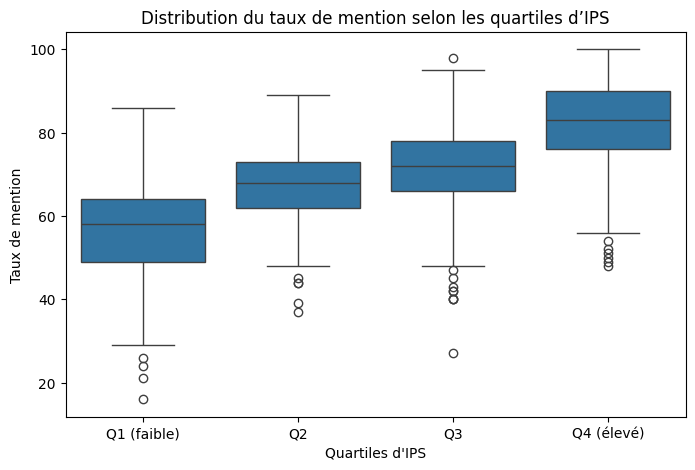

In [19]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(
    x='ips_quartile',
    y='taux_men_gnle',
    data=lycees_data
)
plt.xlabel("Quartiles d'IPS")
plt.ylabel("Taux de mention")
plt.title("Distribution du taux de mention selon les quartiles d’IPS")
plt.show()

Le tableau et la figure présentent les statistiques descriptives du taux de mention selon les quartiles de l’indice de position sociale (IPS) moyen des lycées.

On observe une augmentation nette et monotone du taux de mention moyen et médian lorsque l’on passe des quartiles d’IPS les plus faibles vers les plus élevés.

Ces résultats confirment l’existence d’une forte association entre le profil social moyen des établissements et la réussite scolaire, et soulignent le rôle central de l’origine sociale dans l’analyse des performances éducatives.


### Taux de mention selon présence d’une bibliothèque à 500 m

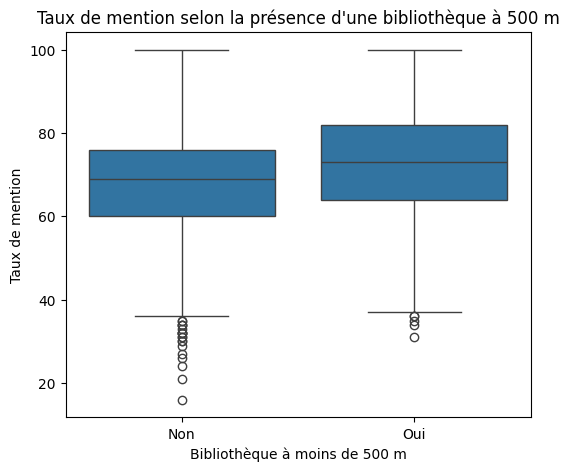

In [20]:
# IPS vs Dummy_500 - boxplot

plt.figure(figsize=(6,5))
sns.boxplot(
    x='dummy_biblio_500',
    y='taux_men_gnle',
    data=lycees_data
)
plt.xlabel("Bibliothèque à moins de 500 m")
plt.ylabel("Taux de mention")
plt.title("Taux de mention selon la présence d'une bibliothèque à 500 m")
plt.xticks([0,1], ['Non', 'Oui'])
plt.show()


Cette figure compare la distribution du taux de mention entre les lycées disposant d’au moins une bibliothèque à moins de 500 mètres et ceux n’en disposant pas.

Les établissements situés à proximité immédiate d’une bibliothèque présentent un taux de mention médian légèrement plus élevé. Toutefois, la dispersion reste importante dans les deux groupes, indiquant une forte hétérogénéité des performances scolaires.

Ces résultats suggèrent l’existence d’une association positive entre l’accès à une bibliothèque et la performance scolaire, bien que cet effet reste modéré et ne puisse être interprété comme causal à ce stade de l’analyse.


### Nombre de bibliothèques accessibles vs taux de mention

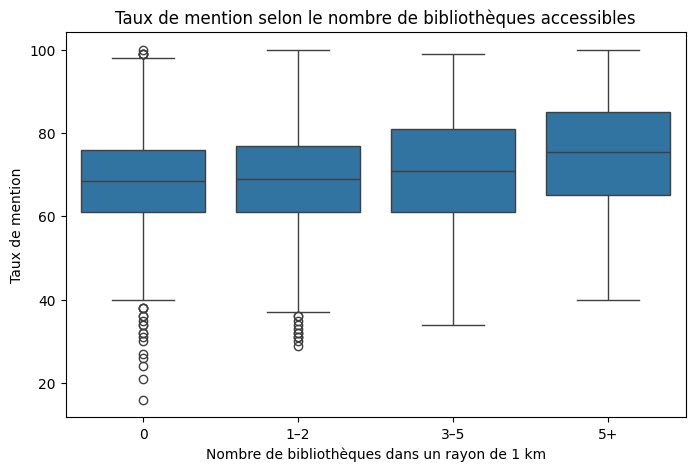

In [21]:
# Classes du nombre de bibliothèques
lycees_data['nb_biblio_classe'] = pd.cut(
    lycees_data['nb_biblio_1000'],
    bins=[-1, 0, 2, 4, lycees_data['nb_biblio_1000'].max()],
    labels=['0', '1–2', '3–5', '5+']
)

plt.figure(figsize=(8,5))
sns.boxplot(
    x='nb_biblio_classe',
    y='taux_men_gnle',
    data=lycees_data
)
plt.xlabel("Nombre de bibliothèques dans un rayon de 1 km")
plt.ylabel("Taux de mention")
plt.title("Taux de mention selon le nombre de bibliothèques accessibles")
plt.show()


La figure illustre la distribution du taux de mention en fonction du nombre de bibliothèques accessibles dans un rayon d’un kilomètre autour des lycées.

On observe une hausse du taux de mention médian entre les établissements ne disposant d’aucune bibliothèque et ceux ayant accès à un nombre limité de bibliothèques. En revanche, au-delà de ce seuil, l’augmentation du nombre de bibliothèques ne s’accompagne plus d’un gain significatif de performance.

Cette observation suggère un possible effet de saturation de l’offre culturelle locale, où l’augmentation quantitative de l’accès ne se traduit pas nécessairement par une amélioration continue des résultats scolaires.

### Secteur public / privé vs taux de mention

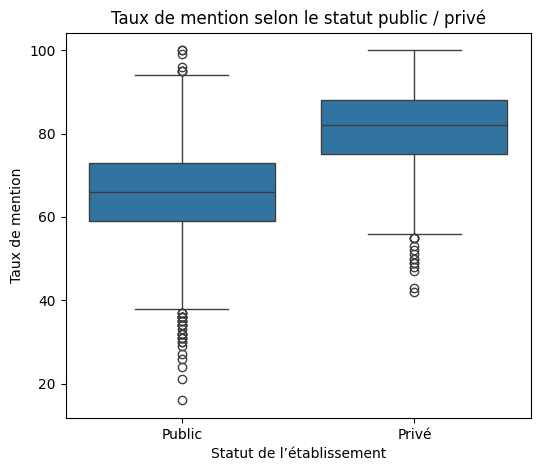

In [22]:
plt.figure(figsize=(6,5))
sns.boxplot(
    x='statut_public_prive',
    y='taux_men_gnle',
    data=lycees_data
)
plt.xlabel("Statut de l’établissement")
plt.ylabel("Taux de mention")
plt.title("Taux de mention selon le statut public / privé")
plt.show()


La figure met en évidence des différences de performance scolaire selon le statut institutionnel des établissements.

Les lycées privés affichent en moyenne des taux de mention plus élevés et une dispersion plus faible que les lycées publics. Cette différence suggère que le statut de l’établissement constitue un facteur contextuel important dans l’analyse des performances scolaires.

Ces écarts justifient l’introduction du statut public ou privé comme variable de contrôle dans les analyses multivariées ultérieures.


### Densité de la commune et taux de mention

In [23]:
print(lycees_data['grille_densite_4'].value_counts())

grille_densite_4
Grands centres urbains            1008
Centres urbains intermédiaires     535
Petites villes                     259
Bourgs ruraux                      151
Name: count, dtype: int64


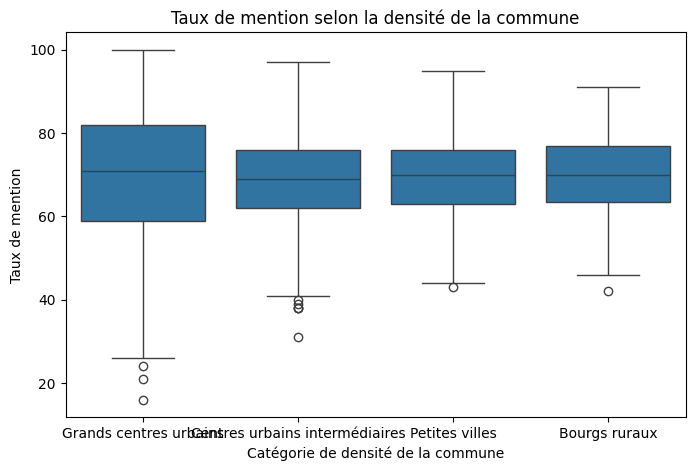

In [24]:

plt.figure(figsize=(8,5))
sns.boxplot(
    y='taux_men_gnle',
    x='grille_densite_4',
    data=lycees_data.dropna(subset=['grille_densite_4']),
)
plt.xlabel("Catégorie de densité de la commune")
plt.ylabel("Taux de mention")
plt.title("Taux de mention selon la densité de la commune")
plt.show()


La figure met en évidence des distributions du taux de mention relativement proches selon les différentes catégories de densité de la commune.

Les médianes et les intervalles interquartiles ne présentent pas de différences marquées entre les groupes, suggérant que la densité territoriale, prise isolément, n’est pas fortement associée aux performances scolaires.

Cette absence de contraste net indique que l’effet potentiel du contexte géographique est médiatisé par d’autres facteurs, notamment sociaux (ips), qui devront être pris en compte dans la modélisation ultérieurement.


### Test de Kruskal Wallis 

Afin d’évaluer si les différences observées dans les distributions du taux de mention selon les catégories de densité de la commune sont statistiquement significatives, un test non paramétrique de Kruskal–Wallis a été réalisé.

Ce test permet de comparer plusieurs groupes indépendants. L’hypothèse nulle du test stipule que les distributions du taux de mention sont identiques entre les différentes catégories de densité territoriale.


In [25]:
from scipy.stats import kruskal

groups = [
    lycees_data[lycees_data['grille_densite_4'] == g]['taux_men_gnle']
    for g in lycees_data['grille_densite_4'].dropna().unique()
]

kruskal(*groups)


KruskalResult(statistic=np.float64(4.350084153891907), pvalue=np.float64(0.22605861372457992))

Le test de Kruskal–Wallis conduit à une p-value de 0,218.

La p-value étant supérieure au seuil de significativité usuel de 5 %, l’hypothèse nulle ne peut pas être rejetée. Ainsi, les différences observées entre les distributions du taux de mention selon les catégories de densité de la commune ne sont pas statistiquement significatives.

Ce résultat suggère que, prise isolément, la densité territoriale n’est pas associée de manière significative aux performances scolaires, mesurées par le taux de mention. Les variations observées peuvent donc s’expliquer par la variabilité interne des groupes ou par l’influence d’autres facteurs explicatifs .

## Modélisation du Taux de Mention

### Objectif

Cette section vise à identifier et quantifier les déterminants du **taux de mention au baccalauréat**, retenu comme indicateur de performance scolaire qualitative. Plus discriminant que le simple taux de réussite, il permet de capter les effets différenciés liés aux caractéristiques des établissements et à leur environnement culturel.

### Cadre méthodologique

La modélisation repose sur une **régression linéaire multiple**, privilégiée pour son interprétabilité et sa capacité à estimer des effets marginaux statistiquement testables. Une attention particulière est portée à la robustesse des estimations via des diagnostics systématiques.

### Variables explicatives

Les variables sont structurées en deux ensembles complémentaires :

#### Caractéristiques internes des lycées

Elles décrivent le profil institutionnel, pédagogique et socio-scolaire des établissements :
- Localisation et statut : `libelle_region`, `statut_public_prive`
- Offre de formation : `voie_generale`, `voie_technologique`, `voie_professionnelle`, `post_bac`, etc.
- Sections spécifiques : `section_arts`, `section_cinema`, `section_theatre`, `section_sport`, `section_europeenne`
- Environnement socio-éducatif : `ips_voie_gt`, `ecart_type_voie_gt`, `grille_densite_4`

#### Caractéristiques externes
Elles capturent l’environnement culturel à travers l’**accessibilité spatiale aux bibliothèques**, mesurée par le nombre d’équipements situés dans des rayons croissants autour de chaque lycée.

### Stratégie d’estimation

La démarche suit une procédure standardisée :
1. Analyse exploratoire des relations entre variables.
2. Diagnostic de multicolinéarité (VIF).
3. Estimation complète ou sélection *stepwise* basée sur l’AIC en cas de colinéarité excessive.

### Plan de modélisation spatiale

Cinq modèles successifs sont estimés afin d’évaluer l’effet des bibliothèques selon des **échelles d’accessibilité et des logiques d’usage différenciées** :

1. **Accès immédiat (0–500 m)**  
   Usage opportuniste et spontané.

2. **Accès de proximité (0–1 000 m)**  
   Usage planifié à faible coût de déplacement.

3. **Accès intermédiaire (0–2 000 m)**  
   Usage régulier intégré à des routines d’étude.

4. **Contexte territorial élargi (0–5 000 m)**  
   Effet agrégé de l’offre culturelle du bassin de vie.

5. **Segmentation par couronnes disjointes**  
   Tranches 0–500 m, 500–1 000 m, 1 000–2 000 m, 2 000–5 000 m, permettant d’isoler l’effet propre à chaque échelle spatiale.

### Outil d’analyse

L’ensemble des estimations est implémenté dans une classe Python dédiée (`PipelineRegression`), intégrant les diagnostics, la gestion de la multicolinéarité et la sélection des modèles, garantissant une analyse reproductible et cohérente.

### Sélection des variables explicatives

In [26]:
from src.classe_modelisation import PipelineRegression
model = PipelineRegression()
data = lycees_data.copy()
cat_vars = ['libelle_region',
       'statut_public_prive', 'voie_generale', 'voie_technologique', 'voie_professionnelle', 'section_arts',
       'section_cinema', 'section_theatre', 'section_sport', 'section_europeenne', 'post_bac', 'grille_densite_4']
num_vars = [ 'ips_voie_gt',
       'ecart_type_voie_gt']
vars_internes = cat_vars+num_vars
target = "taux_men_gnle"
print(PipelineRegression.__doc__)


Pipeline de modélisation de régression linéaire avec gestion étendue des variables catégorielles.

Cette classe implémente une approche structurée pour l'analyse exploratoire,
le diagnostic et la modélisation statistique, adaptée aux jeux de données
avec des variables mixtes (catégorielles et continues).

Attributs
---------
X : array-like
    Variables explicatives standardisées
y : array-like
    Variable cible
model : statsmodels.regression.linear_model.RegressionResultsWrapper
    Modèle statistique ajusté
scaler : StandardScaler
    Standardiseur pour les variables explicatives
standardisation : bool
    Indicateur de standardisation des données
feature_names : List[str]
    Noms des caractéristiques utilisées
target_name : str
    Nom de la variable cible
cat_features : List[str]
    Liste des variables catégorielles
num_features : List[str]
    Liste des variables numériques



#### Relation entre les variables catégorielles et le taux de mention

/home/onyxia/work/ensae-pythonds/src/classe_modelisation.py:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/home/onyxia/work/ensae-pythonds/src/classe_modelisation.py:190: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/home/onyxia/work/ensae-pythonds/src/classe_modelisation.py:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/home/onyxia/work/ensae-pythonds/src/classe_modelisation.py:221: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False 

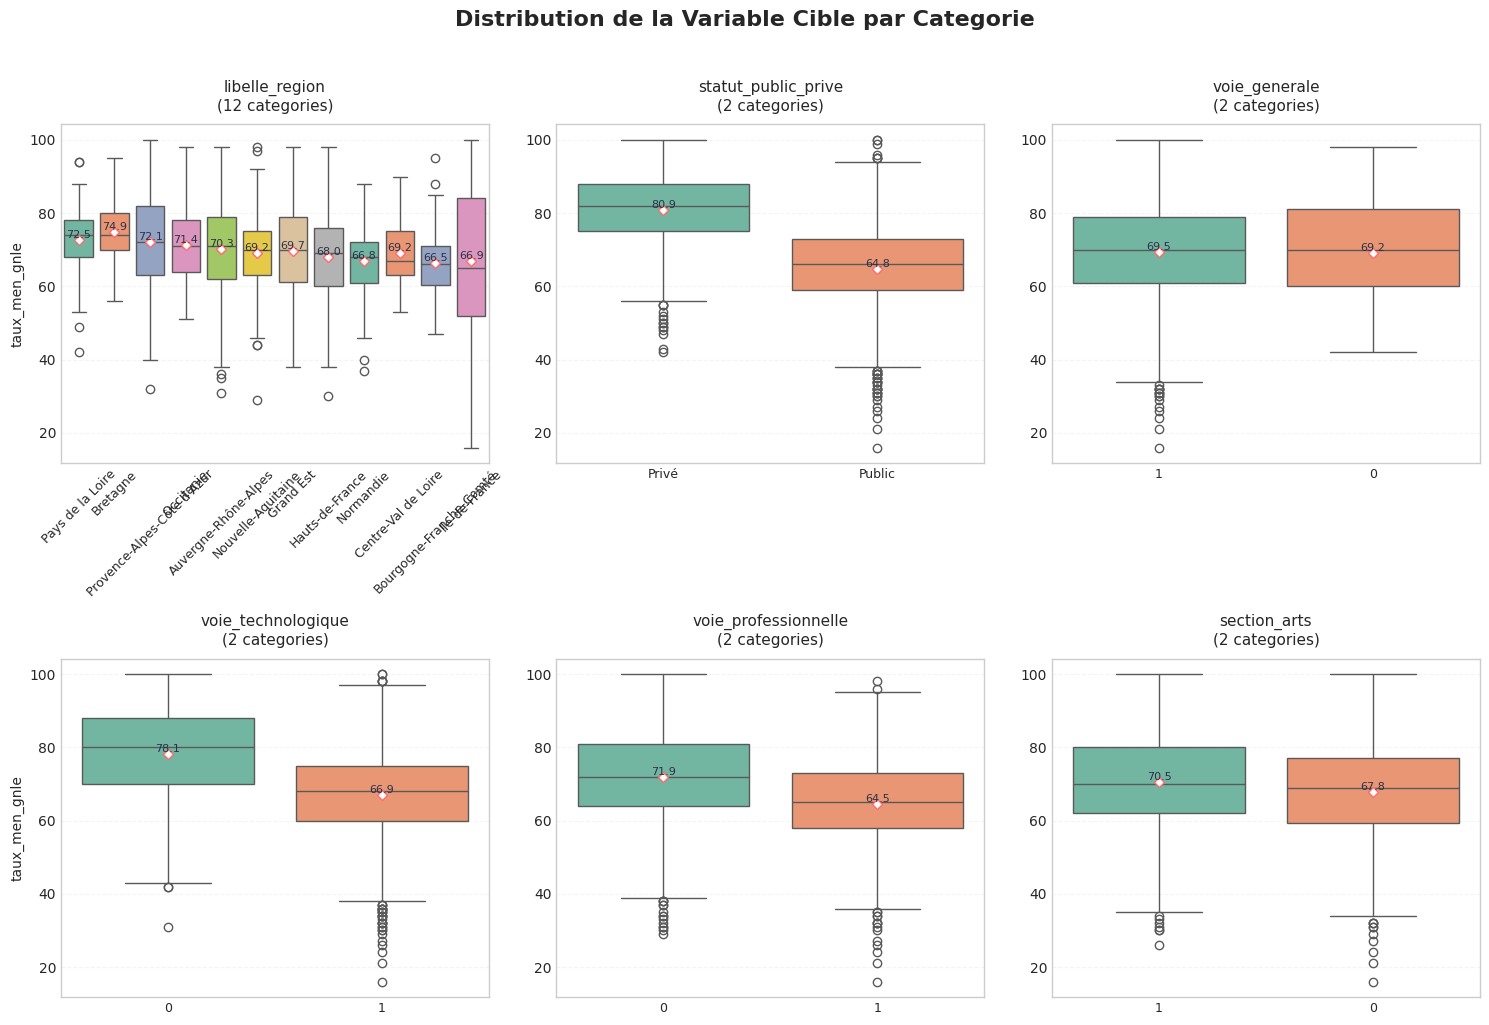

In [27]:
boxplots = model.boxplots_categoriels(data=data , features=cat_vars[:6] , target=target)
plt.show()

/home/onyxia/work/ensae-pythonds/src/classe_modelisation.py:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/home/onyxia/work/ensae-pythonds/src/classe_modelisation.py:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/home/onyxia/work/ensae-pythonds/src/classe_modelisation.py:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/home/onyxia/work/ensae-pythonds/src/classe_modelisation.py:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/home/on

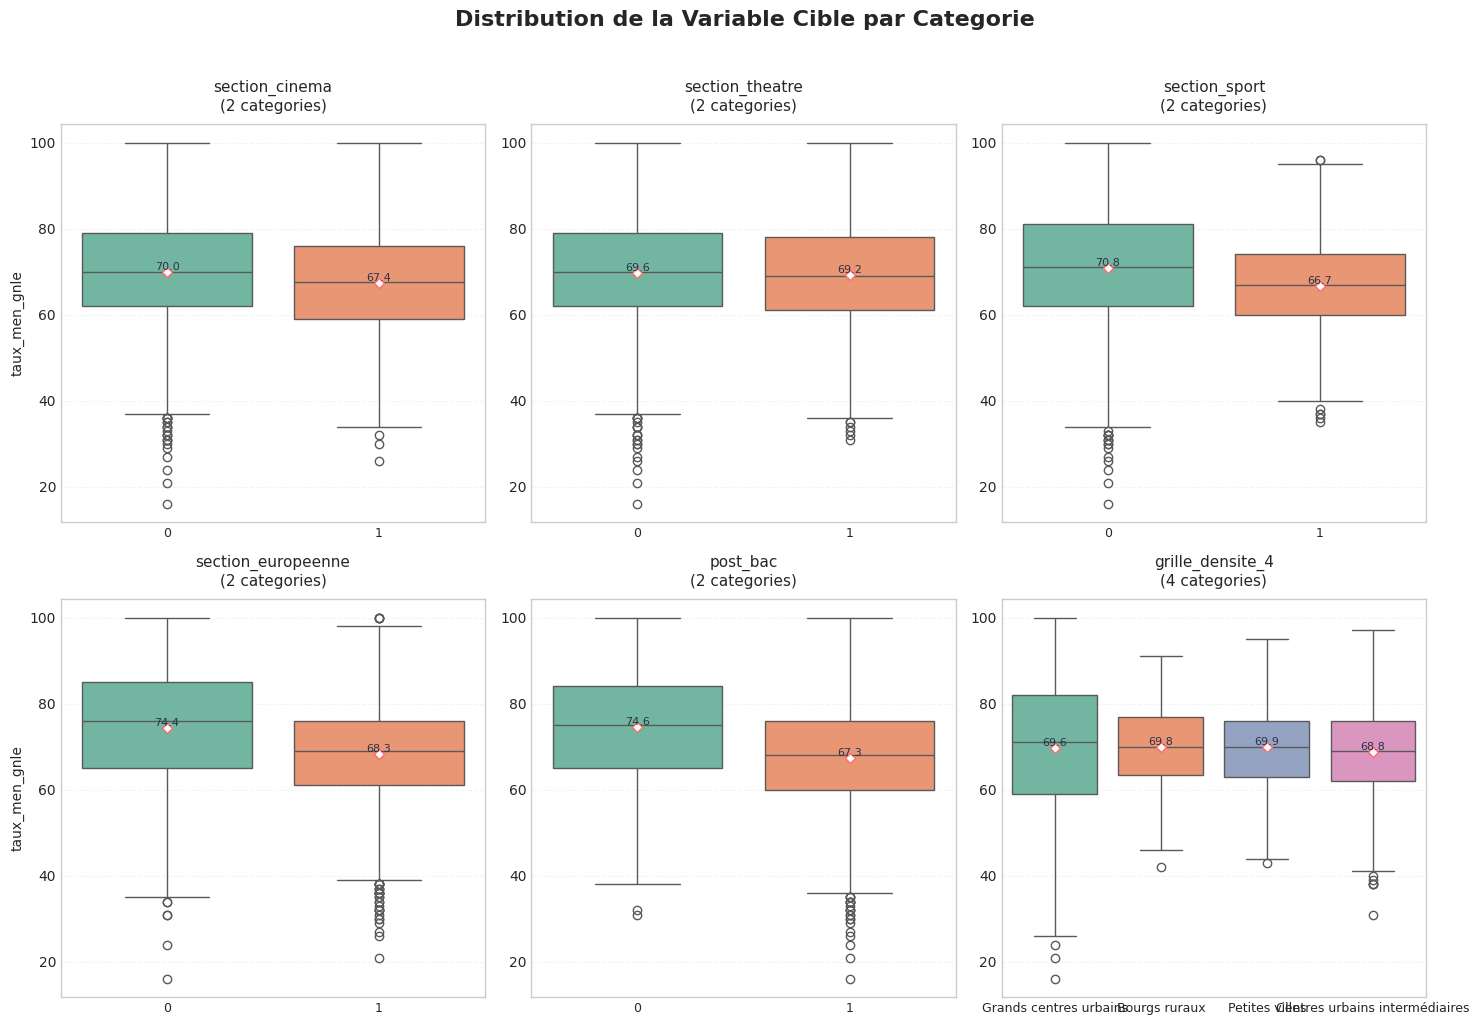

In [28]:
boxplots = model.boxplots_categoriels(data=data , features=cat_vars[6:] , target=target)
plt.show()

**Interprétation des résultats** : L’analyse des boxplots révèle des variations significatives du taux de mention selon les caractéristiques catégorielles des lycées. Les établissements privés affichent un taux moyen supérieur à celui des publics, tout comme ceux proposant une voie générale ou une section européenne. À l’inverse, la présence d’une voie professionnelle, d’une section sportive ou d’un post-bac est associée à un taux de mention plus faible. Sur le plan territorial, les lycées situés dans les grands centres urbains obtiennent en moyenne des résultats légèrement supérieurs aux autres zones, tandis que les régions présentent des écarts notables, avec des performances plus élevées dans certaines comme la Bretagne ou l’Île-de-France. Ces différences suggèrent que le profil pédagogique, le statut et le contexte géographique influencent fortement la performance académique qualitative, même si la dispersion interne reste importante au sein de chaque catégorie.

#### Relation entre les variables continues et le taux de mention

<Figure size 1200x1000 with 0 Axes>

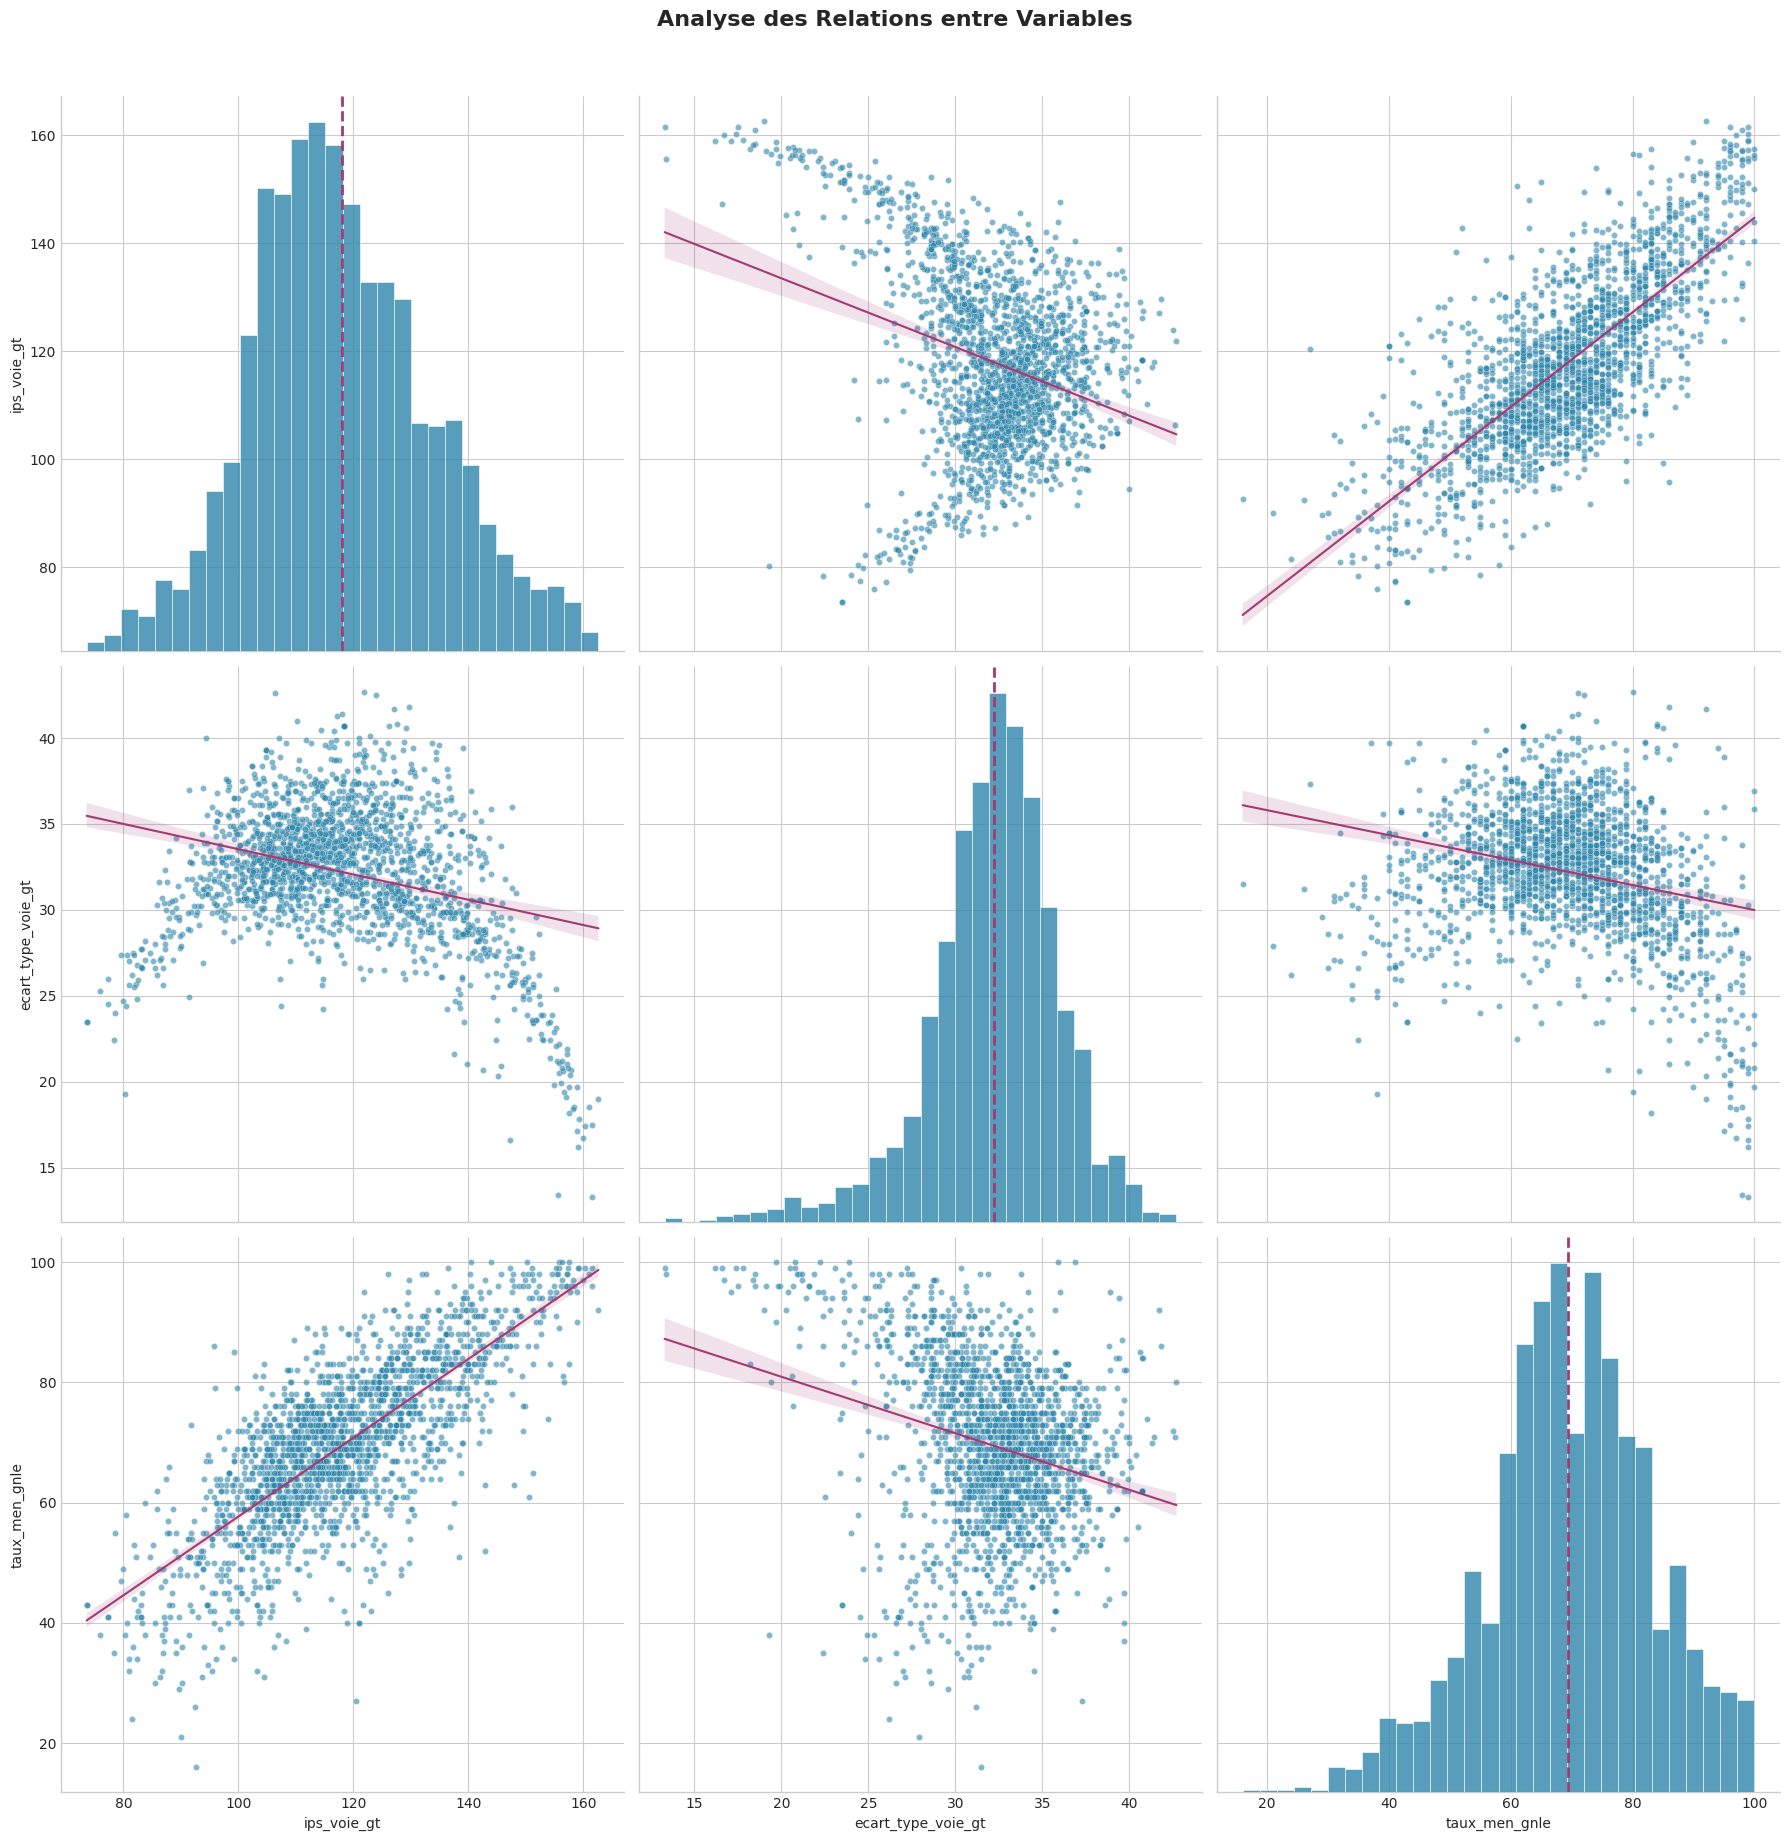

In [29]:
fig = model.paires_plot(data=data , features=num_vars , target=target)
plt.show()

**Interprétation des résultats** : L’analyse des relations entre variables continues et le taux de mention met en évidence deux tendances principales. D’une part, l’indice de position sociale (ips_voie_gt), qui reflète le profil socio-économique des élèves, est positivement corrélé au taux de mention : les établissements avec un IPS supérieur à 120 affichent en moyenne un taux de mention dépassant 75 %, contre environ 60 % pour ceux situés en dessous de 100. D’autre part, la dispersion de l'ips (ecart_type_voie_gt) présente une corrélation négative : plus la variabilité de l'ips au sein du lycée est élevée , par exemple au-delà de 35 points , plus le taux de mention moyen tend à baisser, souvent sous la barre des 65 %. Ces deux indicateurs, combinés, suggèrent que la performance qualitative est favorisée par un environnement socio-éducatif homogène et favorable, et pénalisée par une forte hétérogénéité de niveau social des élèves. La distribution du taux de mention elle-même est centrée autour de 70 %, avec une étendue allant de 40 % à 95 %, ce qui confirme la forte disparité entre établissements.

#### Matrice de corrélation : détection de la multicolinéarité

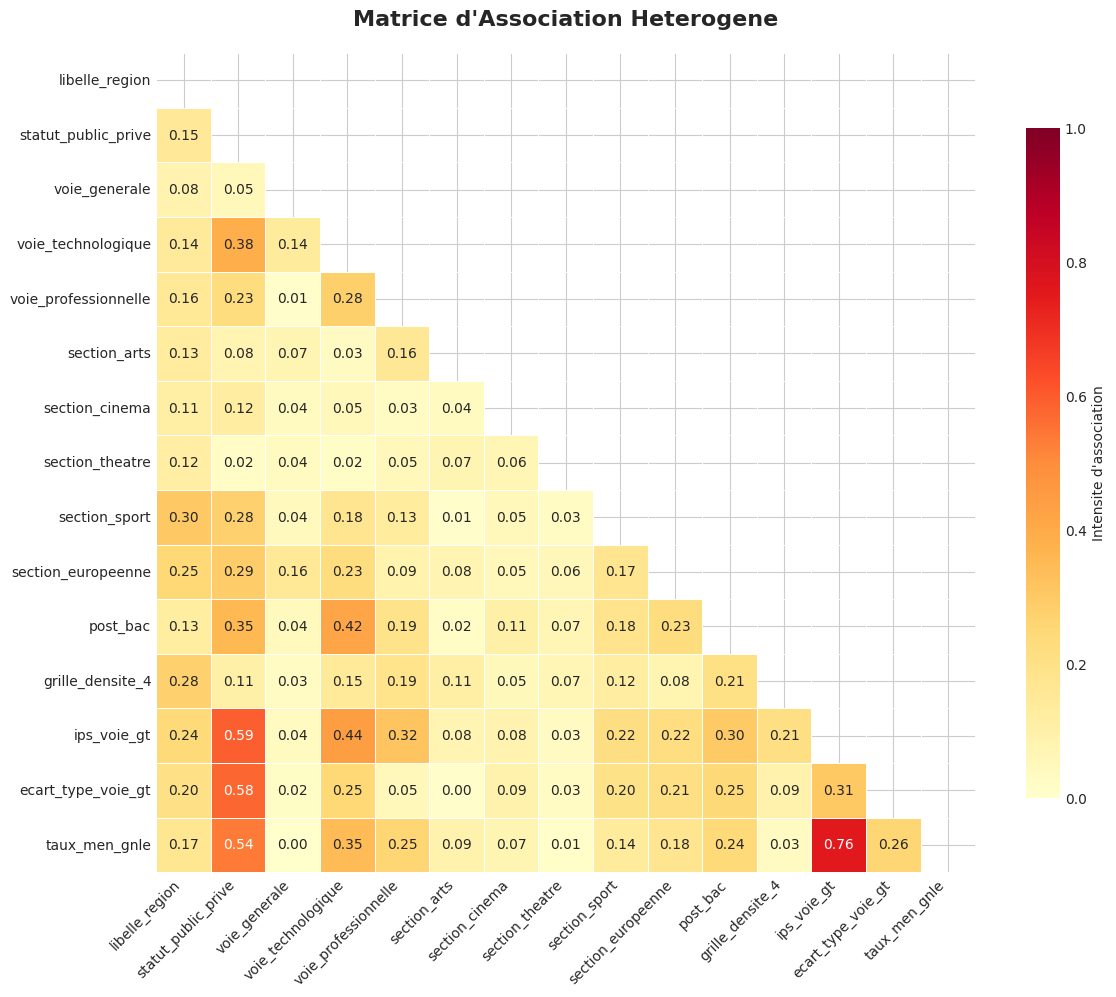

In [30]:
matrix = model.mixed_association_heatmap(data=data , features=vars_internes , target=target)
plt.show()

**Interprétation des résultats** : La matrice d’association révèle des niveaux modérés à faibles de multicolinéarité entre les variables explicatives, ce qui est favorable pour une estimation robuste en régression. Les corrélations les plus fortes concernent les variables socio-économiques : l’IPS (ips_voie_gt) est modérément lié à son écart-type (0.58) et corrélé au taux de mention (0.76) , ce qui reflète le lien direct avec la performance scolaire plutôt qu’un problème de colinéarité. Parmi les variables catégorielles, seule la présence d’une voie technologique montre une association notable avec le statut privé (0.38) et post bac (0.41), mais ces valeurs restent en dessous du seuil critique généralement admis (0.7). Aucune paire de variables n’affiche de corrélation très élevée, ce qui permet de retenir l’ensemble des variables dans un modèle sans risque majeur de biais d’estimation. La structure de la matrice confirme donc la pertinence de la sélection initiale des variables.

### 1. Accès immédiat et usage opportuniste des bibliothèques  
Rayon : 0–500 mètres

In [31]:
features_1_1 = vars_internes+["dummy_biblio_500"]
features_1_2 = vars_internes+["nb_biblio_500"]
rayon = 500

In [32]:

model.fit(data=data , features=features_1_1 , target=target , include_robust=True , standardisation=False ,first = True , rayon = rayon)

In [33]:

model.fit(data=data , features=features_1_2 , target=target , include_robust=True , standardisation=False ,first = False, rayon = rayon)

**Interprétation des résultats** :  Les résultats des deux modèles montrent un effet significatif de la proximité immédiate aux bibliothèques sur le taux de mention au baccalauréat général.

Dans le premier modèle, la simple présence d'au moins une bibliothèque dans un rayon de 500 mètres est associée à une augmentation de 0,96 point du taux de mention, toutes choses égales par ailleurs. Cet effet est statistiquement significatif au seuil de 5%. Cela suggère qu'un accès immédiat, même minimal, à une bibliothèque influence positivement la performance scolaire qualitative.

Le second modèle, utilisant une variable continue du nombre de bibliothèques, révèle un effet dose-réponse : chaque bibliothèque supplémentaire dans ce rayon immédiat augmente le taux de mention de 0,41 point. La significativité statistique (p=0,033) confirme la robustesse de cette relation.

La comparaison des deux spécifications indique que l'effet de présence capte l'essentiel de l'impact, avec un rendement décroissant pour les bibliothèques additionnelles. L'indice de position sociale (IPS) reste le déterminant principal avec un coefficient de 0,65, soulignant que l'effet des bibliothèques, bien que significatif, est d'une amplitude moindre que les caractéristiques socio-économiques des élèves.

### 2. Accès de proximité planifié et préférence pour un faible coût de déplacement  
Rayon : 0–1 000 mètres

In [34]:
features_2_1 = vars_internes+["dummy_biblio_1000"]
features_2_2 = vars_internes+["nb_biblio_1000"]
rayon = 1000

In [35]:

model.fit(data=data , features=features_2_1 , target=target, include_robust=True , standardisation=False ,first = True, rayon = rayon)

In [36]:

model.fit(data=data , features=features_2_2 , target=target, include_robust=True , standardisation=False ,first = False, rayon = rayon)

**Interprétation des résultats** : L'analyse de l'effet de proximité à 1000 mètres apporte des nuances importantes.

Le premier modèle indique que la présence d'au moins une bibliothèque dans ce rayon est associée à une augmentation de 1,29 point du taux de mention, soit un effet plus prononcé qu'à 500 mètres (0,96 point). Ce résultat, hautement significatif (p=0,001), suggère que l'accès planifié dans un rayon de 10 minutes de marche a un impact supérieur à la simple proximité immédiate. Cela pourrait refléter l'importance d'un équipement culturel accessible dans le cadre des déplacements quotidiens.

Le second modèle, quantifiant l'effet du nombre de bibliothèques, révèle une relation plus faible et à la limite de la significativité statistique (coefficient de 0,13, p=0,085). Cela suggère que l'effet principal est capté par la présence d'au moins un équipement, avec des rendements décroissants pour les bibliothèques additionnelles dans ce rayon.

La comparaison entre les deux échelles spatiales (500m et 1000m) est instructive. L'effet plus fort à 1000 mètres pourrait indiquer que cet équilibre spatial correspond mieux aux pratiques effectives des lycéens, combinant accessibilité et utilité pour les travaux scolaires. L'effet à 500 mètres, bien que réel, pourrait concerner une population plus restreinte (internes, riverains immédiats).

### 3. Usage régulier structuré et tolérance à un coût de mobilité intermédiaire  
Rayon : 0–2 000 mètres


In [37]:
features_3_1 = vars_internes+["dummy_biblio_2000"]
features_3_2 = vars_internes+["nb_biblio_2000"]
rayon = 2000

In [38]:

model.fit(data=data , features=features_3_1 , target=target, include_robust=True , standardisation=False ,first = True, rayon = rayon)

In [39]:
model.fit(data=data , features=features_3_2 , target=target, include_robust=True , standardisation=False ,first = False, rayon = rayon)

 **Interprétation des résultats** : Pour un rayon de 2000 mètres, les résultats révèlent une atténuation de l'effet spécifique de la présence des bibliothèques.

Le premier modèle montre que la présence d'au moins une bibliothèque dans ce rayon est associée à une augmentation de 1,20 point du taux de mention, un effet légèrement inférieur à celui observé à 1000 mètres (1,29 point) et significatif au seuil de 5%. Cet impact positif persiste donc pour une distance correspondant à un déplacement nécessitant potentiellement des transports, mais son amplitude diminue, suggérant un effet de décroissance spatiale.

Le second modèle confirme cette atténuation : le coefficient associé au nombre de bibliothèques (0,0415) est très faible et statistiquement non significatif (p=0,231). Cela indique clairement qu'à cette échelle, seule la présence d'un équipement minimal importe, sans effet supplémentaire lié à la densité de l'offre.

La comparaison avec les échelles précédentes dessine un gradient spatial net. L'effet maximal semble se situer autour de 1000 mètres, distance optimale combinant accessibilité et utilité pratique. À 2000 mètres, l'effet persiste mais s'affaiblit, peut-être en raison de coûts de mobilité plus élevés qui réduisent la fréquence d'usage effectif. Ce modèle correspondrait davantage à un usage occasionnel ou spécialisé plutôt qu'à une pratique régulière intégrée au rythme scolaire.

### 4. Effet agrégé de contexte territorial et accessibilité via les transports collectifs  
Rayon : 0–5 000 mètres

In [40]:
features_4_1 = vars_internes+["dummy_biblio_5000"]
features_4_2 = vars_internes+["nb_biblio_5000"]
rayon = 5000

In [41]:

model.fit(data=data , features=features_4_1 , target=target, include_robust=True , standardisation=   False ,first = True, rayon = rayon)

In [42]:

model.fit(data=data , features=features_4_2 , target=target, include_robust=True , standardisation=False , first = False ,rayon = rayon )

 **Interprétation des résultats** : À l'échelle élargie de 5000 mètres, correspondant au bassin de vie accessible via les transports, l'effet spécifique de la présence des bibliothèques devient plus ambigu.

Le premier modèle montre un coefficient positif de 1,34 point associé à la présence d'au moins une bibliothèque, mais cette relation n'est que marginalement significative (p=0,054). Cela suggère que l'accès à un équipement culturel dans ce rayon élargi pourrait avoir un effet résiduel sur la performance scolaire, mais que cet effet est moins robuste statistiquement que pour les distances plus courtes.

Le second modèle révèle une relation extrêmement ténue : chaque bibliothèque supplémentaire dans ce rayon n'augmente le taux de mention que de 0,015 point, avec une significativité statistique limite (p=0,079). Cette quasi-nullité du coefficient confirme que la densité de l'offre culturelle à cette échelle spatiale n'a pratiquement pas d'impact différentiel sur les résultats.

La persistance d'un effet faible mais détectable à cette échelle suggère deux interprétations possibles. D'une part, elle pourrait refléter un effet de contexte territorial où la présence d'équipements culturels signale un environnement globalement favorable à la scolarité. D'autre part, elle pourrait capturer des usages très spécifiques et occasionnels (recherches approfondies, préparation de projets) justifiant des déplacements exceptionnels. Cependant, la faiblesse des coefficients confirme que l'essentiel de l'effet des bibliothèques sur la performance scolaire se situe dans un rayon de proximité inférieur à 2000 mètres.

### 5. Segmentation fine des échelles d’accessibilité par tranches de distance disjointes
Rayon : 0 – 500 mètres , 500 - 1 000 mètres , 1 000 - 2 000 mètres , 2 000 - 5 000 mètres 

In [43]:
data["nb_biblio_0_500"] = data["nb_biblio_500"]
data["nb_biblio_500_1000"] = data["nb_biblio_1000"] - data["nb_biblio_500"]
data["nb_biblio_1000_2000"] = data["nb_biblio_2000"] - data["nb_biblio_1000"]
data["nb_biblio_2000_5000"] = data["nb_biblio_5000"] - data["nb_biblio_2000"]

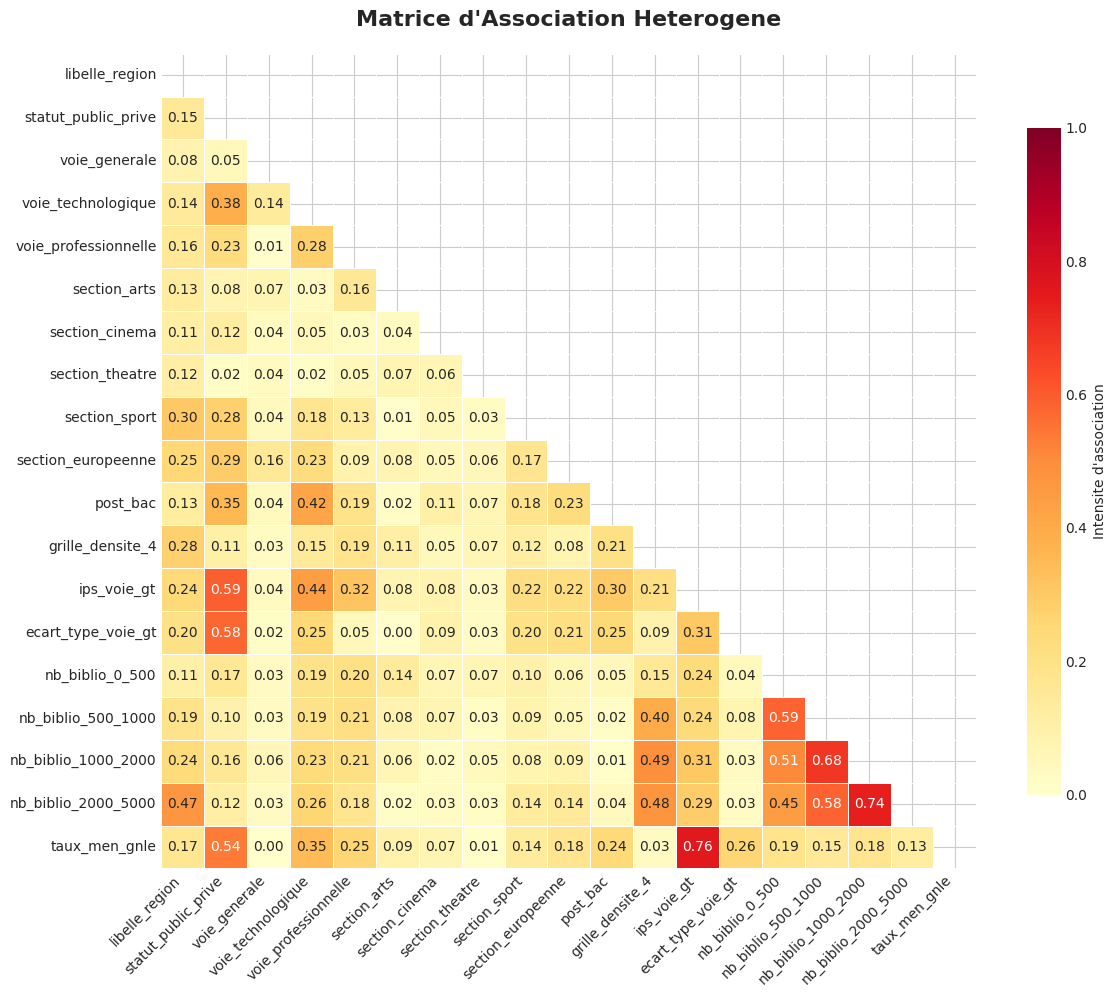

In [44]:
matrix = model.mixed_association_heatmap(data=data , features=vars_internes + ["nb_biblio_0_500", "nb_biblio_500_1000", "nb_biblio_1000_2000", "nb_biblio_2000_5000"] , target=target)
plt.show()

 **Interprétation des résultats** : L’analyse de la matrice d’association révèle une multicolinéarité notable entre les variables mesurant le nombre de bibliothèques à différentes échelles spatiales. En particulier, la variable nb_biblio_2000_5000 présente une forte corrélation (notamment 0,74) avec nb_biblio_1000_2000 . Ces liens forts suggèrent un chevauchement important dans l’information captée par ces variables, ce qui risque de biaiser les estimations en régression.

Pour préserver la stabilité du modèle et éviter les effets de colinéarité, il est recommandé d’exclure nb_biblio_2000_5000 des analyses ultérieures. Les autres variables restent pertinentes et leur corrélation modérée permet une interprétation plus fiable des effets spécifiques à chaque échelle d’accessibilité.

In [45]:

features_5 = vars_internes + ["nb_biblio_0_500", "nb_biblio_500_1000", "nb_biblio_1000_2000"]

In [46]:

model.fit(data=data , features=features_5 , target=target, include_robust=True , standardisation=False)

 **Interprétation des résultats** : Le modèle de segmentation fine (corrigé de la multicolinéarité entre couronnes), révèle une hiérarchie spatiale claire dans l'effet des bibliothèques sur le taux de mention.

Seule la couronne immédiate (0-500 mètres) présente un coefficient notable (0,393) avec une significativité marginale (p=0,085). Cette persistance confirme que l'essentiel de l'effet bénéfique se concentre dans un rayon de proximité immédiate, compatible avec un usage spontané et intégré aux routines scolaires quotidiennes.

Les deux couronnes suivantes (500-1000 m et 1000-2000 m) présentent des coefficients statistiquement nuls, indiquant qu'au-delà de 500 mètres, le nombre de bibliothèques supplémentaires n'apporte pas d'avantage discernable sur la performance. Ce résultat nuance les modèles précédents où la présence dans un rayon de 1000 mètres semblait bénéfique : lorsque l'on isole les échelles, seule la proximité immédiate reste pertinente.

Cette analyse révèle un effet de seuil spatial marqué. L'accès à une bibliothèque dans l'environnement immédiat de l'établissement semble constituer un atout, mais cet avantage ne s'étend pas aux équipements situés à distance de marche intermédiaire. Cela pourrait refléter des pratiques différenciées : les bibliothèques très proches seraient utilisées pour des travaux courants ou pendant les temps de pause, tandis que celles plus éloignées ne compensent pas l'effet de distance par une offre ou des services suffisamment distinctifs pour influencer les résultats scolaires.

La robustesse de l'effet à 500 mètres, même dans ce modèle contrôlant pour les autres échelles, souligne l'importance stratégique de l'implantation très locale des équipements culturels en relation avec les établissements scolaires.

## Conclusions et perspectives

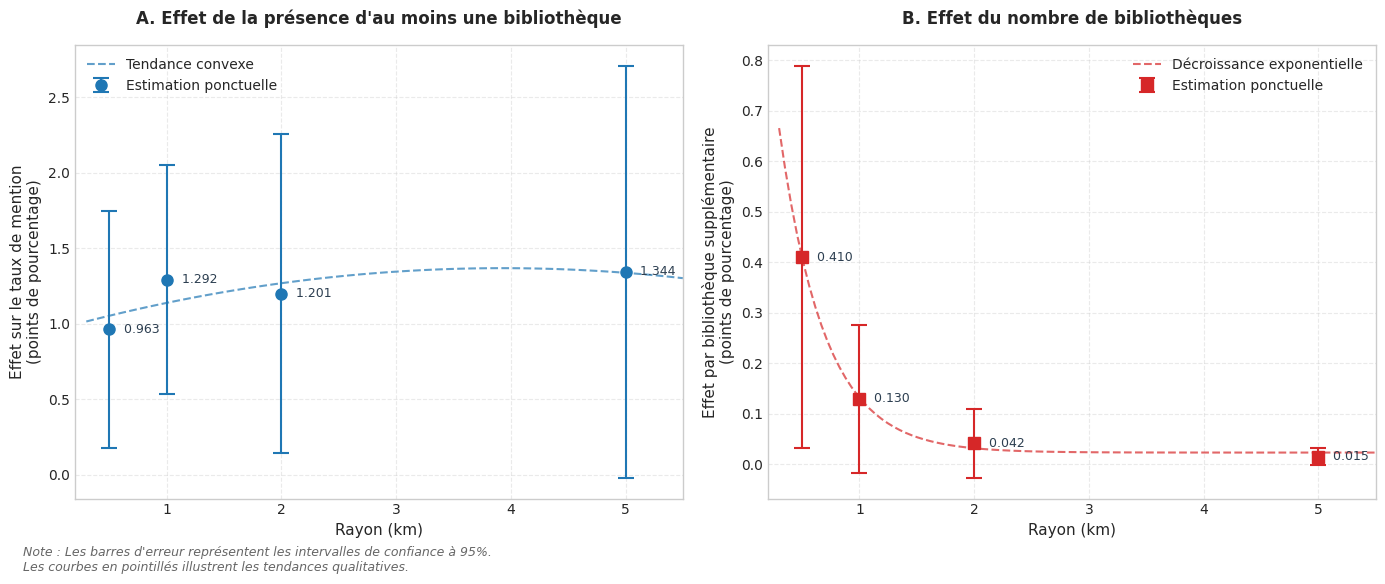

In [47]:
model.plot_coefficients()

L'analyse systématique de l'impact des bibliothèques selon la distance révèle une relation spatiale non linéaire et décroissante avec le taux de mention au baccalauréat : ces résultats dessinent une courbe d’efficacité spatiale  **concave et décroissante**

Les résultats mettent en évidence une courbe d'effet caractérisée par une **concavité** : l'impact est significatif à courte distance, atteint un maximum autour de 1000 mètres, puis décroît pour devenir marginal au-delà de 2000 mètres. La présence d'au moins une bibliothèque dans un rayon de 1000 mètres présente l'effet le plus fort (+1,29 point), dépassant même l'effet de la proximité immédiate à 500 mètres (+0,96 point). Cette convexité suggère l'existence d'une distance optimale, correspondant probablement à un équilibre entre accessibilité quotidienne et utilité pratique pour les travaux scolaires planifiés.

La distinction entre effet de présence et effet de densité est cruciale. Si la simple présence d'un équipement montre l'effet convexe décrit, l'analyse du nombre de bibliothèques révèle une **décroissance spatiale monotone** : chaque bibliothèque supplémentaire n'a d'impact significatif que dans le rayon immédiat (0-500 m, +0,41 point), avec des rendements rapidement décroissants au-delà. Cette divergence s'explique par le fait que l'effet de présence capture l'accès à un service de base, tandis que la densité reflète une offre redondante dont l'utilité marginale diminue avec la distance.

Le modèle de segmentation fine confirme cette hiérarchie spatiale : seul le nombre de bibliothèques dans la couronne 0-500 mètres conserve un effet marginalement significatif, tandis que les couronnes plus éloignées présentent des coefficients statistiquement nuls. Cette cohérence entre les différentes spécifications renforce la robustesse du constat d'un effet concentré dans la proximité immédiate.

D'un point de vue méthodologique, la persistance de la significativité des effets malgré le contrôle d'un large ensemble de caractéristiques scolaires et socio-économiques, dont l'indice de position sociale qui reste le déterminant principal, suggère que l'accessibilité aux bibliothèques constitue un facteur complémentaire indépendant. La cohérence des erreurs standards robustes et la stabilité des coefficients régionaux renforcent la fiabilité des estimations.

En perspectives, ces résultats invitent à considérer plusieurs pistes. Sur le plan des politiques éducatives, ils soulignent l'importance de l'implantation stratégique des bibliothèques à proximité des établissements scolaires, avec une attention particulière pour le rayon de 500 à 1000 mètres qui correspond à la distance de marche optimale. D'un point de vue de la recherche, l'effet convexe observé mériterait des investigations complémentaires sur les pratiques effectives des lycéens selon la distance, notamment sur les usages différenciés (travail individuel, recherche documentaire, préparation aux examens). Enfin, l'analyse gagnerait à intégrer des dimensions qualitatives sur l'offre de services des bibliothèques et sur les modalités de collaboration entre établissements scolaires et équipements culturels.